Pandas 사용법에 대해서 알아보겠습니다. 일단 pandas와 numpy를 import 합니다.

In [4]:
import pandas as pd
import numpy as np

Series()는 list 데이터를 하나의 벡터로 만들어줍니다.

In [5]:
 s = pd.Series([1,3,5,np.nan,6,8])

In [6]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

date_range()함수를 써서 2013년 1월 1일부터(포함하여) 6개의 일련 날짜를 만듭니다.

In [7]:
 dates = pd.date_range('20130101', periods=6)

In [8]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

위에서 만든 dates를 row의 index로 하고 columns의 인덱스를 A B C D로 하는 6x4 데이터를 만듭니다. 데이터의 값은 randn(6,4)로 합니다.

In [10]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [11]:
df

,A,B,C,D
2013-01-01,0.318684,0.767959,1.479689,-0.336243
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534
2013-01-03,0.324837,-0.475097,-2.147350,0.587486
2013-01-04,-0.702213,0.492265,-0.508335,-1.098786
2013-01-05,-1.239646,-0.506329,0.250828,0.435809
2013-01-06,-1.353425,-0.771643,1.634625,-0.431460


dict을 쓰면 각 열벡터를 각각 정의할 수 있습니다. R과 같이 chain rule이 적용됩니다. 'C'에서 정한 index가 전체에 적용되는 것을 볼 수 있습니다.

In [12]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })

In [13]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


열벡터의 데이터 타입을 보려면 dtypes를 호출합니다.

In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

데이터의 앞부분 몇 개를 보려면 head()를 뒷부분을 tail()을 실행합니다.

In [15]:
df.head()

,A,B,C,D
2013-01-01,0.318684,0.767959,1.479689,-0.336243
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534
2013-01-03,0.324837,-0.475097,-2.147350,0.587486
2013-01-04,-0.702213,0.492265,-0.508335,-1.098786
2013-01-05,-1.239646,-0.506329,0.250828,0.435809


In [16]:
df.tail()

,A,B,C,D
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534
2013-01-03,0.324837,-0.475097,-2.147350,0.587486
2013-01-04,-0.702213,0.492265,-0.508335,-1.098786
2013-01-05,-1.239646,-0.506329,0.250828,0.435809
2013-01-06,-1.353425,-0.771643,1.634625,-0.431460


이외에도 열 이름을 보려면 index
컬럼을 보려면 columns
값을 보려면 values

In [17]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
 df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df.values

array([[ 0.31868391,  0.76795855,  1.47968879, -0.33624343],
       [ 0.44255926, -1.02165185, -0.17898359, -0.58953387],
       [ 0.32483694, -0.47509691, -2.14734969,  0.58748608],
       [-0.70221288,  0.49226465, -0.50833525, -1.09878619],
       [-1.23964555, -0.5063289 ,  0.25082798,  0.43580892],
       [-1.35342492, -0.77164258,  1.6346247 , -0.43146043]])

각 컬럼별로 기본적인 통계 데이터를 확인하려면 describe()를 실행합니다.

In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.368201,-0.252416,0.088412,-0.238788
std,0.830794,0.717090,1.398502,0.639851
min,-1.353425,-1.021652,-2.147350,-1.098786
25%,-1.105287,-0.705314,-0.425997,-0.550016
50%,-0.191764,-0.490713,0.035922,-0.383852
75%,0.323299,0.250424,1.172474,0.242796
max,0.442559,0.767959,1.634625,0.587486


전치행렬을 구하려면 T

In [21]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.318684,0.442559,0.324837,-0.702213,-1.239646,-1.353425
B,0.767959,-1.021652,-0.475097,0.492265,-0.506329,-0.771643
C,1.479689,-0.178984,-2.147350,-0.508335,0.250828,1.634625
D,-0.336243,-0.589534,0.587486,-1.098786,0.435809,-0.431460


축을 기준(0=열, 1=행)으로 정렬한다. ascending=True가 디폴트다.

In [27]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.336243,1.479689,0.767959,0.318684
2013-01-02,-0.589534,-0.178984,-1.021652,0.442559
2013-01-03,0.587486,-2.147350,-0.475097,0.324837
2013-01-04,-1.098786,-0.508335,0.492265,-0.702213
2013-01-05,0.435809,0.250828,-0.506329,-1.239646
2013-01-06,-0.431460,1.634625,-0.771643,-1.353425


값을 기준으로(이 때 열 이름 지정) 정렬하려면 sort_values()

In [28]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534
2013-01-06,-1.353425,-0.771643,1.634625,-0.431460
2013-01-05,-1.239646,-0.506329,0.250828,0.435809
2013-01-03,0.324837,-0.475097,-2.147350,0.587486
2013-01-04,-0.702213,0.492265,-0.508335,-1.098786
2013-01-01,0.318684,0.767959,1.479689,-0.336243


In [29]:
df.sort_values(by='B',ascending=False)

,A,B,C,D
2013-01-01,0.318684,0.767959,1.479689,-0.336243
2013-01-04,-0.702213,0.492265,-0.508335,-1.098786
2013-01-03,0.324837,-0.475097,-2.147350,0.587486
2013-01-05,-1.239646,-0.506329,0.250828,0.435809
2013-01-06,-1.353425,-0.771643,1.634625,-0.431460
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534


컬럼(즉, variable)을 고르려면 key값인 컬럼 이름을 적어준다.

In [30]:
df['A']

2013-01-01    0.318684
2013-01-02    0.442559
2013-01-03    0.324837
2013-01-04   -0.702213
2013-01-05   -1.239646
2013-01-06   -1.353425
Freq: D, Name: A, dtype: float64

범위를 주면 데이터의 행을 가져온다. 0에서 2까지 3개를 가져오려면

In [31]:
df[0:3]

,A,B,C,D
2013-01-01,0.318684,0.767959,1.479689,-0.336243
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534
2013-01-03,0.324837,-0.475097,-2.147350,0.587486


행 이름을 지정하면 양쪽이 다 포함된 것을 가져온다.

In [32]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534
2013-01-03,0.324837,-0.475097,-2.147350,0.587486
2013-01-04,-0.702213,0.492265,-0.508335,-1.098786


특정한 k번째 행을 가져오려면 [k:k+1]

In [36]:
df[0:1]

,A,B,C,D
2013-01-01,0.318684,0.767959,1.479689,-0.336243


특정 열을 가져오려면 [,]을 사용한다. 이 때 : 기호는 "모두"라는 뜻이다. 지정할 열은 list로 묶는다.

In [37]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.318684,0.767959
2013-01-02,0.442559,-1.021652
2013-01-03,0.324837,-0.475097
2013-01-04,-0.702213,0.492265
2013-01-05,-1.239646,-0.506329
2013-01-06,-1.353425,-0.771643


다음과 같이 응용 가능하다.

In [38]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.442559,-1.021652
2013-01-03,0.324837,-0.475097
2013-01-04,-0.702213,0.492265


In [39]:
df.loc['20130102',['A','B']]

A    0.442559
B   -1.021652
Name: 2013-01-02 00:00:00, dtype: float64

특정 포인트를 찍어주려면 다음과 같이 한다.

In [40]:
df.loc[dates[0],'A']

0.31868391147622149

iloc를 써서 특정 위치를 쉽게 가져올 수 있다. iloc[3]은 4번째 행을 가져온다.

In [41]:
 df.iloc[3]

A   -0.702213
B    0.492265
C   -0.508335
D   -1.098786
Name: 2013-01-04 00:00:00, dtype: float64

[,]형태로 iloc를 적용하면 행과 열을 슬라이싱(slicing)한다. 3,4번째 행과 0,1번째 열을 가져와보자.

In [42]:
 df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.702213,0.492265
2013-01-05,-1.239646,-0.506329


위치를 지정하는 것도 가능하다.

In [43]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.442559,-0.178984
2013-01-03,0.324837,-2.147350
2013-01-05,-1.239646,0.250828


In [44]:
 df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534
2013-01-03,0.324837,-0.475097,-2.147350,0.587486


In [45]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.767959,1.479689
2013-01-02,-1.021652,-0.178984
2013-01-03,-0.475097,-2.147350
2013-01-04,0.492265,-0.508335
2013-01-05,-0.506329,0.250828
2013-01-06,-0.771643,1.634625


In [46]:
 df.iloc[1,1]

-1.0216518452066194

위와 같지만 좀 더 속도를 빠르게 scalar 값만 가져오려면 iat을 사용한다.

In [47]:
df.iat[1,1]

-1.0216518452066194

간단하게 A열 중 양의 값만 되는 데이터를 추려보자.

In [48]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.318684,0.767959,1.479689,-0.336243
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534
2013-01-03,0.324837,-0.475097,-2.147350,0.587486


데이터를 복사하려면 copy()

In [49]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.318684,0.767959,1.479689,-0.336243,one
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534,one
2013-01-03,0.324837,-0.475097,-2.147350,0.587486,two
2013-01-04,-0.702213,0.492265,-0.508335,-1.098786,three
2013-01-05,-1.239646,-0.506329,0.250828,0.435809,four
2013-01-06,-1.353425,-0.771643,1.634625,-0.431460,three


isin()을 사용하면 해당 값이 있는 것만 추려온다. 

In [50]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.324837,-0.475097,-2.147350,0.587486,two
2013-01-05,-1.239646,-0.506329,0.250828,0.435809,four


Pandas는 결측값으로 np.nan을 사용한다. 데이터를 reindex하고 E컬럼을 추가하면 np.nan이 된다(값이 없어서). 기존에 있던 데이터 프레임에 값을 주려면 loc를 사용한다. 나머지 결측값은 NaN으로 표시된다.

In [52]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.318684,0.767959,1.479689,-0.336243,1.0
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534,1.0
2013-01-03,0.324837,-0.475097,-2.147350,0.587486,NaN
2013-01-04,-0.702213,0.492265,-0.508335,-1.098786,NaN


결측값을 빼려면 dropna(how='any')

In [53]:
     df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.318684,0.767959,1.479689,-0.336243,1.0
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534,1.0


결측값을 채우려면 fillna(value=)를 사용한다.

In [54]:
 df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.318684,0.767959,1.479689,-0.336243,1.0
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534,1.0
2013-01-03,0.324837,-0.475097,-2.147350,0.587486,5.0
2013-01-04,-0.702213,0.492265,-0.508335,-1.098786,5.0


np.nan을 검사하는 명령어는 isnull()이다. 값 별로 True/False로 표시한다.

In [55]:
 pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


열의 평균을 구한다. default=0 (열), 행이면 1이다.

In [56]:
df.mean()

A   -0.368201
B   -0.252416
C    0.088412
D   -0.238788
dtype: float64

In [57]:
df.mean(1)

2013-01-01    0.557522
2013-01-02   -0.336903
2013-01-03   -0.427531
2013-01-04   -0.454267
2013-01-05   -0.264834
2013-01-06   -0.230476
Freq: D, dtype: float64

차원이 다른 것들 사이에서는 저절로 길이를 맞춘다.

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(0)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [62]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(1)
s

2013-01-01    NaN
2013-01-02    1.0
2013-01-03    3.0
2013-01-04    5.0
2013-01-05    NaN
2013-01-06    6.0
Freq: D, dtype: float64

In [63]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

행을 기준으로 값을 빼보자.

In [64]:
 df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.675163,-1.475097,-3.147350,-0.412514
2013-01-04,-3.702213,-2.507735,-3.508335,-4.098786
2013-01-05,-6.239646,-5.506329,-4.749172,-4.564191
2013-01-06,NaN,NaN,NaN,NaN


In [68]:
df

,A,B,C,D
2013-01-01,0.318684,0.767959,1.479689,-0.336243
2013-01-02,0.442559,-1.021652,-0.178984,-0.589534
2013-01-03,0.324837,-0.475097,-2.147350,0.587486
2013-01-04,-0.702213,0.492265,-0.508335,-1.098786
2013-01-05,-1.239646,-0.506329,0.250828,0.435809
2013-01-06,-1.353425,-0.771643,1.634625,-0.431460


함수를 열에 적용하려면 apply를 사용한다. 누적합을 구하는 np.cumsum() 적용 사례

In [66]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.318684,0.767959,1.479689,-0.336243
2013-01-02,0.761243,-0.253693,1.300705,-0.925777
2013-01-03,1.086080,-0.728790,-0.846644,-0.338291
2013-01-04,0.383867,-0.236526,-1.354980,-1.437077
2013-01-05,-0.855778,-0.742854,-1.104152,-1.001268
2013-01-06,-2.209203,-1.514497,0.530473,-1.432729


열에 적용하는 함수를 직접 lambda로 만든 사례

In [67]:
df.apply(lambda x: x.max() - x.min())

A    1.795984
B    1.789610
C    3.781974
D    1.686272
dtype: float64

정수 난수인 np.random.randint()를 써서 10개(size)의 임의 수를 만든다.

In [69]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [70]:
s

0    3
1    2
2    6
3    6
4    0
5    5
6    4
7    4
8    0
9    2
dtype: int32

R의 table()과 같이 해당 도수를 세어보자.

In [71]:
s.value_counts()

6    2
4    2
2    2
0    2
5    1
3    1
dtype: int64

In [72]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [73]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [74]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [75]:
s.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

In [76]:
idx = pd.Index([' jack', 'jill ', ' jesse ', 'frank'])

In [77]:
idx.str.strip()

Index(['jack', 'jill', 'jesse', 'frank'], dtype='object')

In [78]:
idx.str.lstrip()

Index(['jack', 'jill ', 'jesse ', 'frank'], dtype='object')

In [79]:
idx.str.rstrip()

Index([' jack', 'jill', ' jesse', 'frank'], dtype='object')

In [80]:
s2 = pd.Series(['a_b_c', 'c_d_e', np.nan, 'f_g_h'])

In [81]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2          NaN
3    [f, g, h]
dtype: object

In [82]:
s2.str.split('_').str.get(1)

0      b
1      d
2    NaN
3      g
dtype: object

In [83]:
s2.str.split('_').str[1]

0      b
1      d
2    NaN
3      g
dtype: object

In [84]:
 s2.str.split('_', expand=True)

,0,1,2
0,a,b,c
1,c,d,e
2,NaN,None,None
3,f,g,h


In [85]:
 s2.str.split('_', expand=True, n=1)

,0,1
0,a,b_c
1,c,d_e
2,NaN,None
3,f,g_h


In [86]:
s3 = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca',
   ....:                '', np.nan, 'CABA', 'dog', 'cat'])

In [87]:
s3.str.replace('^.a|dog', 'XX-XX ', case=False)

0           A
1           B
2           C
3    XX-XX ba
4    XX-XX ca
5            
6         NaN
7    XX-XX BA
8      XX-XX 
9     XX-XX t
dtype: object

In [88]:
dollars = pd.Series(['12', '-$10', '$10,000'])
dollars.str.replace(r'-\$', '-')

0         12
1        -10
2    $10,000
dtype: object

In [89]:
pd.Series(['a1', 'b2', 'c3']).str.extract('(?P<letter>[ab])(?P<digit>\d)', expand=False)

,letter,digit
0,a,1
1,b,2
2,NaN,NaN


In [90]:
pattern = r'[0-9][a-z]'
pd.Series(['1', '2', '3a', '3b', '03c']).str.contains(pattern)

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [91]:
 pd.Series(['1', '2', '3a', '3b', '03c']).str.match(pattern)

0    False
1    False
2     True
3     True
4    False
dtype: bool

In [92]:
df = pd.DataFrame(np.random.randn(10, 4))

In [93]:
df

,0,1,2,3
0,-1.498788,0.957002,1.283227,1.136430
1,0.292670,0.194777,0.341233,0.149756
2,-1.386921,-0.851447,-0.131391,0.784466
3,-1.576786,0.920806,0.526340,-1.269490
4,0.603895,0.491596,1.795752,1.840963
5,0.164591,0.292783,-0.500270,-1.158657
6,1.298826,-1.349986,1.399268,0.309959
7,0.317740,0.232471,-0.067786,2.015385
8,0.258129,-1.944874,-1.631374,-0.534189
9,-2.180747,-0.195942,-0.056484,0.817883


쪼개보자.

In [94]:
pieces = [df[:3], df[3:7], df[7:]]

concat로 쉽게 합칠 수 있다.

In [95]:
pd.concat(pieces)

,0,1,2,3
0,-1.498788,0.957002,1.283227,1.136430
1,0.292670,0.194777,0.341233,0.149756
2,-1.386921,-0.851447,-0.131391,0.784466
3,-1.576786,0.920806,0.526340,-1.269490
4,0.603895,0.491596,1.795752,1.840963
5,0.164591,0.292783,-0.500270,-1.158657
6,1.298826,-1.349986,1.399268,0.309959
7,0.317740,0.232471,-0.067786,2.015385
8,0.258129,-1.944874,-1.631374,-0.534189
9,-2.180747,-0.195942,-0.056484,0.817883


In [96]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [97]:
left

,key,lval
0,foo,1
1,foo,2


In [98]:
right

,key,rval
0,foo,4
1,foo,5


카르테지안 곱을 한다.

In [99]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [100]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

키가 unique하다면 equjoin이 수행된다.

In [101]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [102]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]

행을 추가하는 일반적인 방법은 append이다. 본래 있던 index를 무시하려면 ignore_index=True

In [103]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.418895,0.517758,-0.522209,-0.100009
1,-1.090592,1.337415,-0.877768,-1.678397
2,-0.455753,0.265137,-0.808381,-0.682789
3,-1.179441,0.582595,0.876961,1.458681
4,-0.058517,0.661233,-0.290085,-0.813822
5,1.764446,-0.954428,-0.110916,0.983619
6,-0.797865,0.597030,-0.712802,0.376787
7,0.188783,0.185809,-0.438454,0.757575
8,-1.179441,0.582595,0.876961,1.458681


In [104]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})

In [105]:
df

,A,B,C,D
0,foo,one,0.951606,0.381276
1,bar,one,0.181717,0.179988
2,foo,two,0.949889,1.720557
3,bar,three,-0.871411,0.438999
4,foo,two,0.832672,-1.755371
5,bar,two,-2.186126,1.268409
6,foo,one,0.967355,1.231424
7,foo,three,-0.460544,-0.541919


그룹으로 지정할 열을 정한 다음 sum함수를 적용하여 C와 D의 총합을 구한다.

In [106]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.875819,1.887395
foo,3.240978,1.035967


cross table형태로 표현할 수도 있다.

In [107]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.181717  0.179988
    three -0.871411  0.438999
    two   -2.186126  1.268409
foo one    1.918961  1.612700
    three -0.460544 -0.541919
    two    1.782561 -0.034814

In [108]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))

In [109]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

멀티 인덱스를 만들어서 보다 복잡한 형태의 데이터 프레임도 만들 수 있다.

In [110]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [111]:
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [112]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [113]:
df

A         B
first second                    
bar   one    -1.528516  0.503415
      two     0.773723 -0.296504
baz   one    -0.515245  0.402978
      two    -0.082855 -0.231892
foo   one     1.673667 -0.346077
      two    -0.022761  0.569847
qux   one     0.580567  1.527054
      two    -0.656420 -0.066305

In [114]:
df2 = df[:4]

In [115]:
df2

A         B
first second                    
bar   one    -1.528516  0.503415
      two     0.773723 -0.296504
baz   one    -0.515245  0.402978
      two    -0.082855 -0.231892

값을 하나의 스택으로 쌓아줄 수도 있다.

In [116]:
stacked = df2.stack()

In [117]:
stacked

first  second   
bar    one     A   -1.528516
               B    0.503415
       two     A    0.773723
               B   -0.296504
baz    one     A   -0.515245
               B    0.402978
       two     A   -0.082855
               B   -0.231892
dtype: float64

In [118]:
stacked.values

array([-1.52851608,  0.50341527,  0.77372289, -0.29650365, -0.51524475,
        0.40297781, -0.08285541, -0.23189222])

In [119]:
stacked.unstack()

A         B
first second                    
bar   one    -1.528516  0.503415
      two     0.773723 -0.296504
baz   one    -0.515245  0.402978
      two    -0.082855 -0.231892

In [120]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})

3차원으로 되어 있는 테이블의 경우 pivot을 하여 2차원 데이터로 쉽게 바꿀 수 있다.

In [121]:
df

,A,B,C,D,E
0,one,A,foo,-0.986523,-0.016704
1,one,B,foo,-0.884772,-0.269092
2,two,C,foo,-0.773199,-0.546442
3,three,A,bar,-0.361110,-0.728352
4,one,B,bar,-1.567667,-0.270497
5,one,C,bar,0.576534,1.194646
6,two,A,foo,-0.732933,-1.170053
7,three,B,foo,0.730540,-0.693513
8,one,C,foo,0.457477,-0.558482
9,one,A,bar,0.840277,-0.599600


값은 values, 행은 index, 열은 columns 파라미터로 조정하는 pivot_table()

In [122]:
 pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.840277 -0.986523
      B -1.567667 -0.884772
      C  0.576534  0.457477
three A -0.361110       NaN
      B       NaN  0.730540
      C  1.193479       NaN
two   A       NaN -0.732933
      B  1.083956       NaN
      C       NaN -0.773199

In [123]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    23363
Freq: 5T, dtype: int32

In [127]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

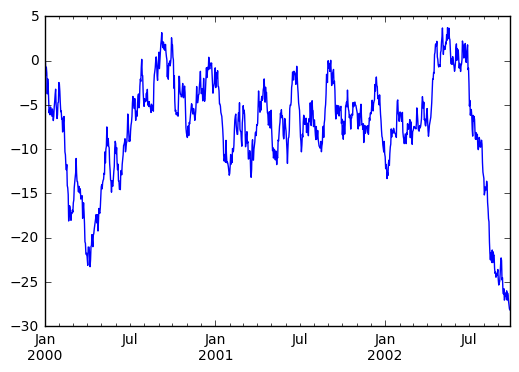

In [128]:
plt.show()

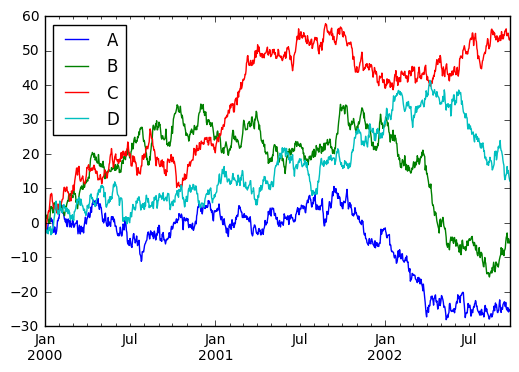

In [129]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')
plt.show()

In [130]:
df.to_csv('foo.csv')
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.644341,-0.533011,-0.117112,-0.512574
1,2000-01-02,-0.359655,-0.145902,-1.500922,-1.249606
2,2000-01-03,-1.755126,1.520461,-1.803988,-2.327129
3,2000-01-04,-2.702405,2.198315,-0.271546,-2.261686
4,2000-01-05,-2.694252,1.328207,0.264282,-2.853766
5,2000-01-06,-2.944262,2.302710,1.296458,-2.114969
6,2000-01-07,-1.634052,1.735131,1.821513,-2.334241
7,2000-01-08,-0.204116,0.786764,3.110553,-3.158651
8,2000-01-09,0.066233,0.085942,3.544890,-1.528623
9,2000-01-10,1.013136,-0.127689,3.243916,-1.302913


In [131]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.644341,-0.533011,-0.117112,-0.512574
2000-01-02,-0.359655,-0.145902,-1.500922,-1.249606
2000-01-03,-1.755126,1.520461,-1.803988,-2.327129
2000-01-04,-2.702405,2.198315,-0.271546,-2.261686
2000-01-05,-2.694252,1.328207,0.264282,-2.853766
2000-01-06,-2.944262,2.302710,1.296458,-2.114969
2000-01-07,-1.634052,1.735131,1.821513,-2.334241
2000-01-08,-0.204116,0.786764,3.110553,-3.158651
2000-01-09,0.066233,0.085942,3.544890,-1.528623
2000-01-10,1.013136,-0.127689,3.243916,-1.302913
